In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data = pd.read_csv('C:/Users/Dell/Downloads/weather_classification_data.csv')

In [3]:
#Display Data
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


                                                              DATA CLEANING

In [4]:
#Display Basic Statistical information on Dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [5]:
#Chcking for Null Values
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
#Checking for Duplicated Values
data.duplicated().sum()

0

In [7]:
#Display Datatypes
data.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [8]:
#Renaming columns by adding units of measurement to column name for better data interpretation
data.rename(columns={'Atmospheric Pressure': 'Atmospheric Pressure(hPa)'}, inplace = True)
data.rename(columns={'Wind Speed': 'Wind Speed(km/hr)'}, inplace = True)
data.rename(columns={'Temperature': 'Temperature(C)'}, inplace = True)
data.rename(columns={'Humidity': 'Humidity(%)'}, inplace = True)

In [9]:
#Checking value count of Categorcial Columns
data['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [10]:
data['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [11]:
data['Location'].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

In [12]:
data['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [13]:
#Converting Object data into Categorical data
object_columns = ['Cloud Cover', 'Season', 'Weather Type', 'Location']
for col in object_columns:
    data[col] = data[col].astype('category')

In [14]:
data.dtypes

Temperature(C)                float64
Humidity(%)                     int64
Wind Speed(km/hr)             float64
Precipitation (%)             float64
Cloud Cover                  category
Atmospheric Pressure(hPa)     float64
UV Index                        int64
Season                       category
Visibility (km)               float64
Location                     category
Weather Type                 category
dtype: object

In [15]:
#Splitting Dataset into Categorical and Numerical Columns
categorical_columns = ['Cloud Cover', 'Season', 'Location']
numerical_columns = ['Atmospheric Pressure(hPa)', 'Wind Speed(km/hr)', 'Temperature(C)', 'Humidity(%)', 
                     'Precipitation (%)', 'UV Index', 'Visibility (km)']

                                                    EXPLORATORY DATA ANALYSIS(EDA)

In [16]:
#Creating dataframe of categorical values for plotting countplot
categorical_plot = ['Cloud Cover', 'Season', 'Location']
enumerate(categorical_plot)

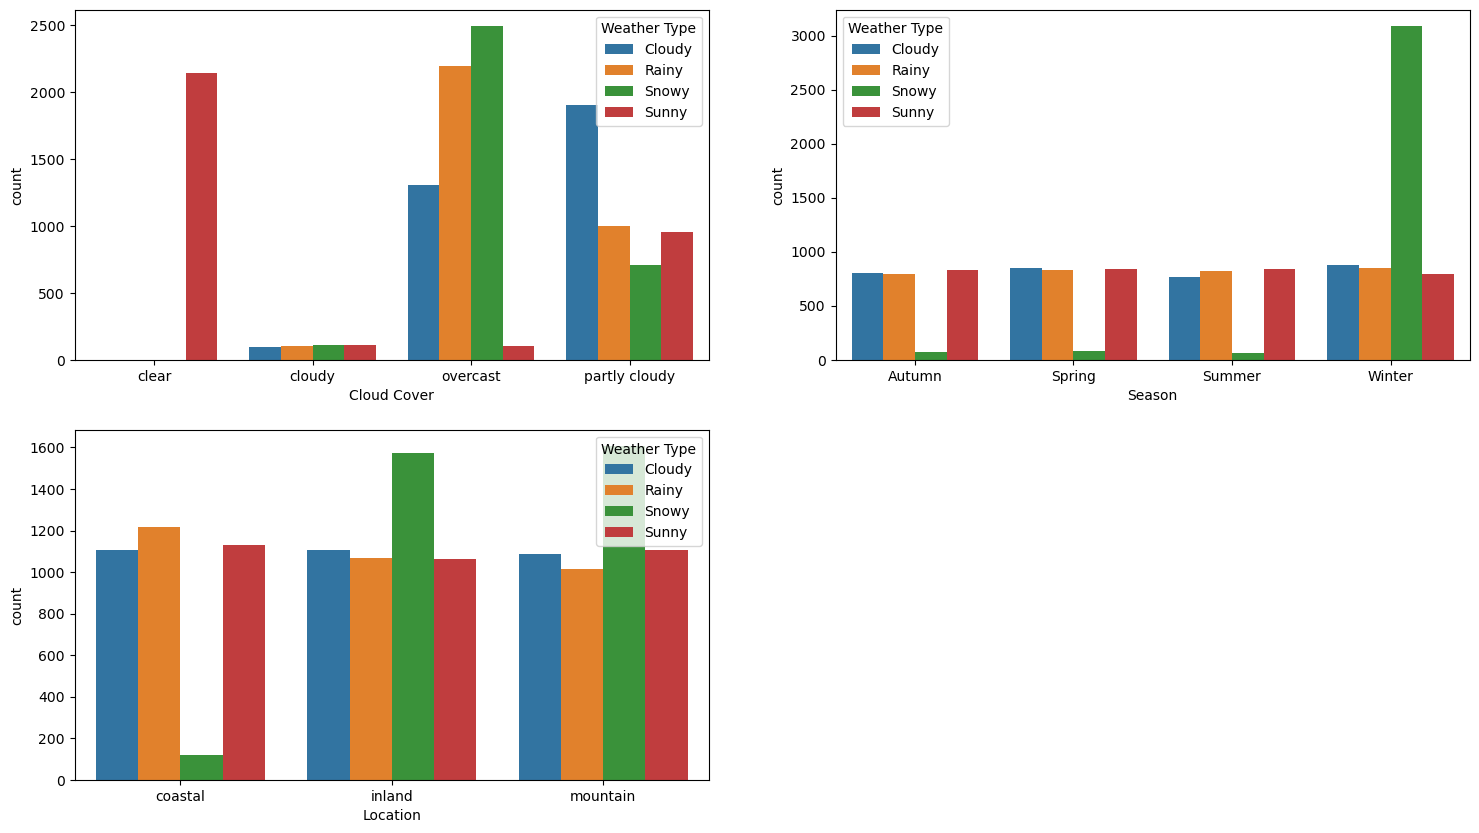

In [17]:
#Displaying categorical variables and their relationships with target column
plt.figure(figsize=(18,10))
for i in enumerate(categorical_plot):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(x = i[1], hue = 'Weather Type', data = data)
    plt.savefig('catplot')

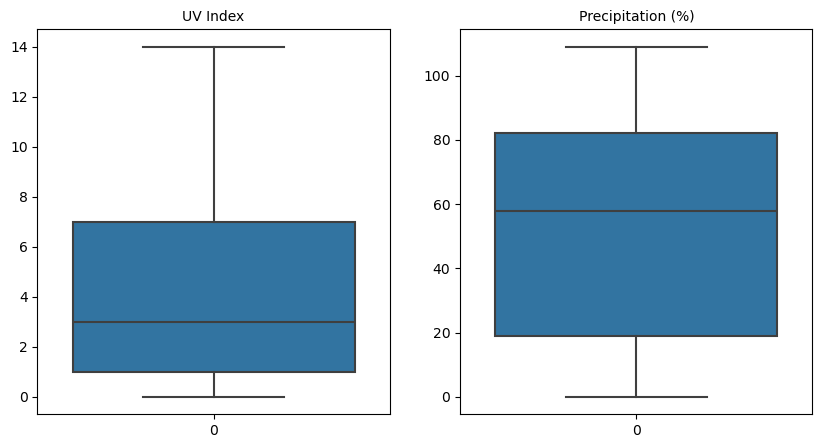

In [18]:
#Displaying boxplot for outlier detection
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('UV Index', fontsize = 10)
sns.boxplot(data['UV Index'])
plt.subplot(1,2,2)
plt.title('Precipitation (%)', fontsize = 10)
sns.boxplot(data['Precipitation (%)'])
plt.savefig('box1')

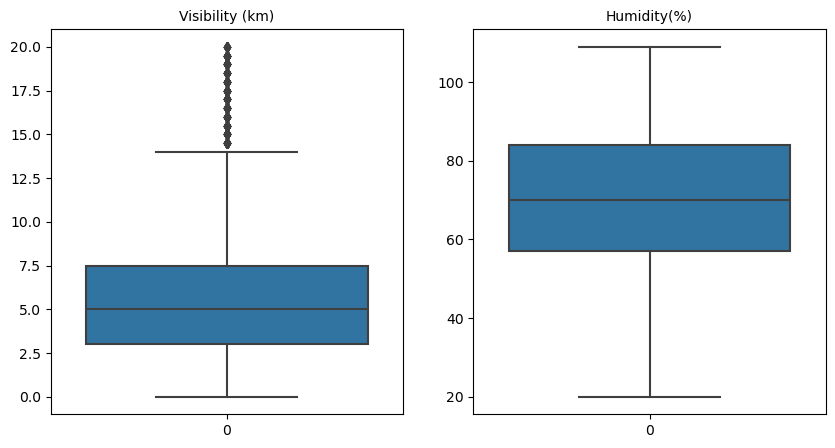

In [19]:
#Displaying boxplot for outlier detection
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Visibility (km)', fontsize = 10)
sns.boxplot(data['Visibility (km)'])
plt.subplot(1,2,2)
plt.title('Humidity(%)', fontsize = 10)
sns.boxplot(data['Humidity(%)'])
plt.savefig('box2')

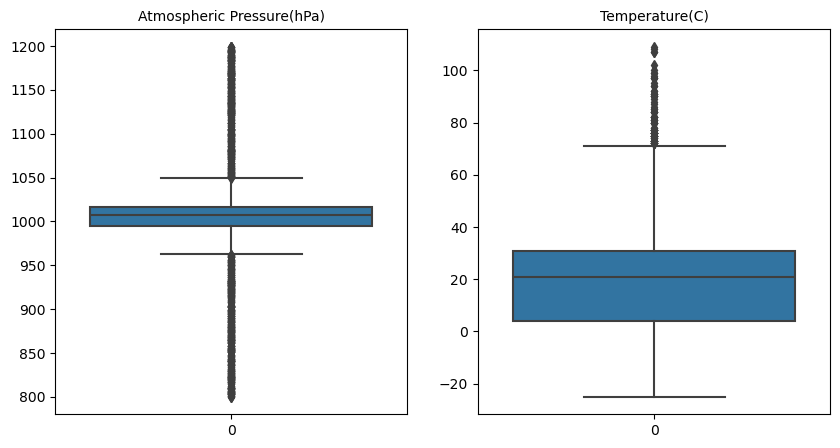

In [20]:
#Displaying boxplot for outlier detection
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Atmospheric Pressure(hPa)', fontsize = 10)
sns.boxplot(data['Atmospheric Pressure(hPa)'])
plt.subplot(1,2,2)
plt.title('Temperature(C)', fontsize = 10)
sns.boxplot(data['Temperature(C)'])
plt.savefig('box3')

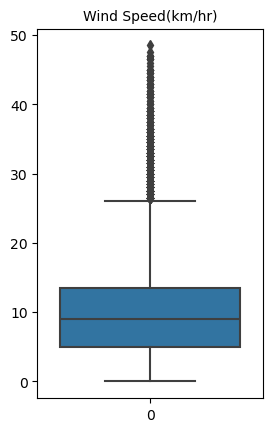

In [21]:
#Displaying boxplot for outlier detection
plt.subplot(1,2,2)
plt.title('Wind Speed(km/hr)', fontsize = 10)
sns.boxplot(data['Wind Speed(km/hr)'])
plt.savefig('box4')

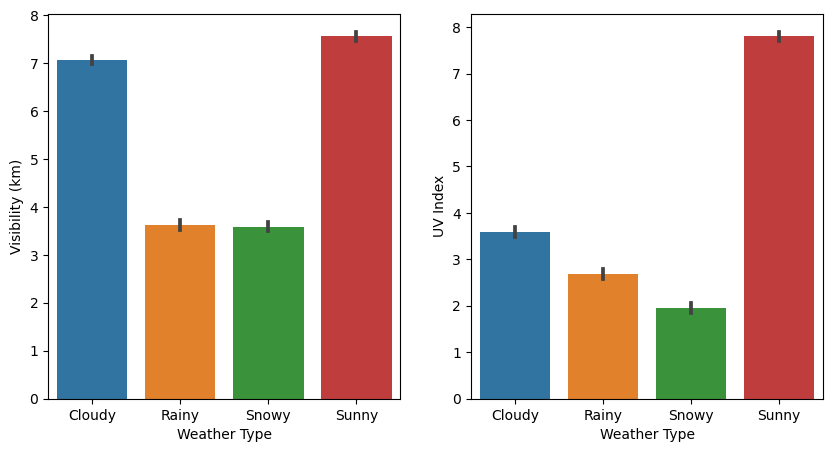

In [22]:
#Displaying barplot, showing relationship between numerical variables and target column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='Weather Type', y='Visibility (km)', data=data)
plt.subplot(1,2,2)
sns.barplot(x='Weather Type', y='UV Index', data=data)
plt.savefig('bar1')

Visibility (km)


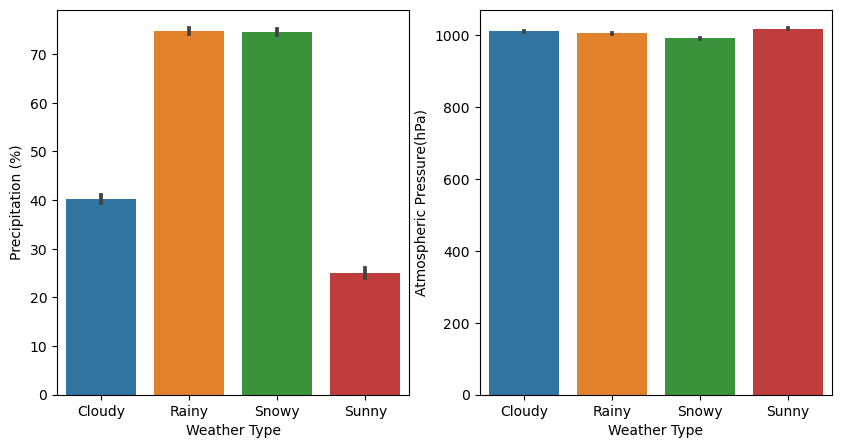

In [23]:
#Displaying barplot, showing relationship between numerical variables and target column
plt.figure(figsize=(10,5))
print('Visibility (km)')
plt.subplot(1,2,1)
sns.barplot(x='Weather Type', y='Precipitation (%)', data=data)
plt.subplot(1,2,2)
sns.barplot(x='Weather Type', y='Atmospheric Pressure(hPa)', data=data)
plt.savefig('bar2')

Visibility (km)


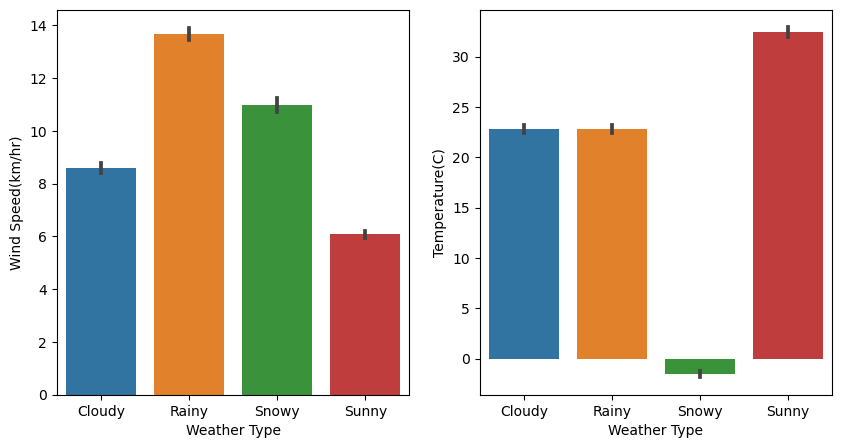

In [24]:
#Displaying barplot, showing relationship between numerical variables and target column
plt.figure(figsize=(10,5))
print('Visibility (km)')
plt.subplot(1,2,1)
sns.barplot(x='Weather Type', y='Wind Speed(km/hr)', data=data)
plt.subplot(1,2,2)
sns.barplot(x='Weather Type', y='Temperature(C)', data=data)
plt.savefig('bar3')

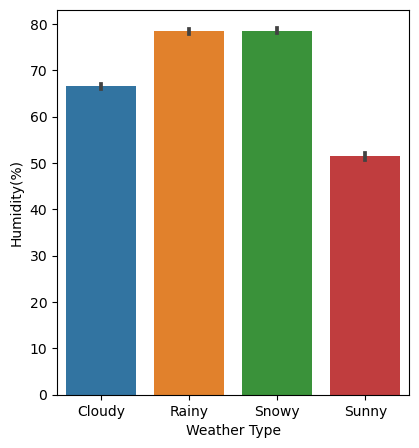

In [25]:
#Displaying barplot, showing relationship between numerical variables and target column
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.barplot(x='Weather Type', y='Humidity(%)', data=data)
plt.savefig('bar4')

                                                       FEATURE SELECTION

In [26]:
data_numeric = data[numerical_columns]

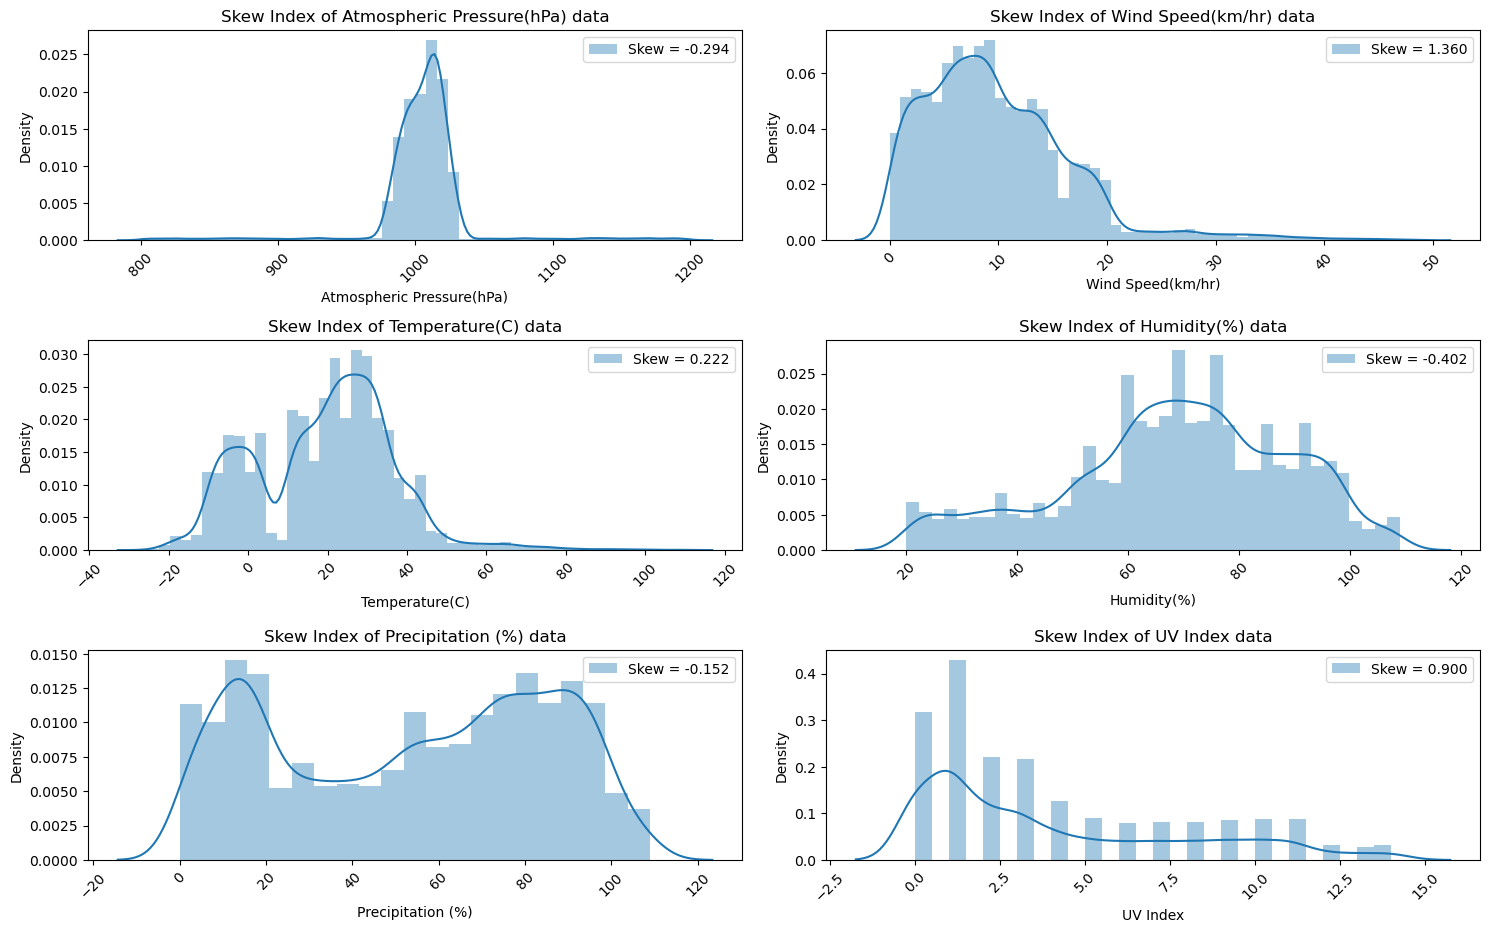

In [27]:
#Displaying kdeplot, showing data distribution and skewness of dataset
plt.figure(figsize = (15, 15))
for i, col in enumerate(data_numeric.columns[:-1], 1):
    plt.subplot(5, 2, i)
    skewness = data_numeric[col].skew()
    sns.distplot(data_numeric[col], kde = True, label = "Skew = %.3f" %(skewness))
    plt.title(f"Skew Index of {col} data")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.xticks(rotation = 45)
    plt.plot()
    plt.savefig('skew')

                                                 OUTLIER DETECTION AND CLEANING USING ZSCORE

In [28]:
#Creating function to detect and thoroughly clean outliers from the entire numerical column using zscore
def remove_outliers_zscore(data, column_name, threshold = 2):
    z_scores = zscore(data[column_name])
    data = data.loc[(z_scores < threshold) & (z_scores > -threshold)]
    return data

In [29]:
data = remove_outliers_zscore(data, 'Temperature(C)')
data.shape

(12759, 11)

In [30]:
data = remove_outliers_zscore(data, 'Precipitation (%)')
data.shape

(12759, 11)

In [31]:
data = remove_outliers_zscore(data, 'Atmospheric Pressure(hPa)')
data.shape

(12036, 11)

In [32]:
data = remove_outliers_zscore(data, 'UV Index')
data.shape

(11668, 11)

In [33]:
data = remove_outliers_zscore(data, 'Wind Speed(km/hr)')
data.shape

(11294, 11)

In [34]:
data = remove_outliers_zscore(data, 'Humidity(%)')
data.shape

(10685, 11)

In [35]:
data = remove_outliers_zscore(data, 'Visibility (km)')
data.shape

(10519, 11)

                                            SPLITTING DATSET INTO TRAINING AND TESTING DATA 

In [36]:
#Renaming target column for dropping
data.rename({'Weather Type':'Weather_Type','Weather Type':'Weather_Type'}, axis = 1, inplace = True)

In [37]:
#Splitting dataset into X(features) and Y(Target) for training and prediction
X=data.drop(['Weather_Type'], axis = 1)
y=data['Weather_Type']

In [38]:
#Test size data = 30%, Training size data = 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [39]:
y

0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather_Type, Length: 10519, dtype: category
Categories (4, object): ['Cloudy', 'Rainy', 'Snowy', 'Sunny']

                                                           BUILDING DATA PIPELINE

In [40]:
#Build pipeline to handle data transformation and prevent data leakage
numerical_pipeline = Pipeline(steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])
                                                                
categorical_pipeline = Pipeline(steps = [('encoding', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))])

In [41]:
categorical_pipeline

Pipeline(steps=[('encoding',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [42]:
# Using ColumnTransformers to apply transformation to each specified columns in dataset
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_pipeline, numerical_columns),
                ('cat', categorical_pipeline, categorical_columns)],
remainder = 'drop',
n_jobs = -1)

In [43]:
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Atmospheric Pressure(hPa)',
                                  'Wind Speed(km/hr)', 'Temperature(C)',
                                  'Humidity(%)', 'Precipitation (%)',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [44]:
#fitting training and testing data into the preprocessed pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

                                                        DIMENSIONALITY REDUCTION

In [45]:
#importing PCA
from sklearn.decomposition import PCA

In [46]:
#fitting preprocessed data into new reduced and improved dimensions
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

In [47]:
#Displaying x_train_pca
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca

,0,1,2,3,4
0,2.069638,-0.315938,0.659685,0.066905,0.129284
1,3.085371,0.290030,0.075142,0.776361,0.464543
2,-1.556095,1.943595,0.186346,1.638360,-0.631727
3,0.848773,3.005644,0.402700,0.142689,0.425586
4,1.201270,1.552856,-1.743496,1.506725,0.009877
...,...,...,...,...,...
7358,-2.454999,-0.407684,0.165266,0.332921,0.261150
7359,-2.704055,0.209501,0.934445,0.224326,0.536186
7360,-1.226196,0.531064,0.728173,0.321744,-0.722538
7361,-1.907453,0.792197,0.483479,-0.362807,0.858487


                                         HYPER-PARAMETER TUNING, CROSS VALIDATION AND MODEL SELECTION

In [48]:
#Importing Estimators
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [49]:
#Creating Grid of Parameters for tuning our chosen Classifier models
rf_clf = {
    'n_estimators': np.arange(100, 200, 10), 
    'max_depth': np.arange(5, 15, 1),          
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]}

grad_clf = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': np.arange(3, 10, 1)}

sv_clf = {
    'C': np.arange(1, 100, 9),
    'kernel': ['linear', 'rbf', 'poly']}

knn_clf = {
    'n_neighbors': np.arange(10, 30, 2), 
    'weights': ['uniform', 'distance'],          
    'algorithm': ['auto', 'kd_tree']            }

log_reg = {
    'solver': ['lbfgs'], 
    'C': [0.1, 1.0, 10, 100],
    'penalty': ['l2', 'l1', 'elasticnet'],  
    'class_weight': ['None', 'balanced'],
    'multi_class': ['multinomial', 'ovr']}

In [50]:
#Import Cross-Validation 
from sklearn.model_selection import RandomizedSearchCV

In [51]:
#Set random Hyperparamter search for RandomForestClassifier
rfcv_clf = RandomizedSearchCV(RandomForestClassifier(random_state = 50),                   
                                 param_distributions =  rf_clf,        
                                 cv = 5,                                   
                                 n_iter=10,
                                 verbose = True
)
#Fit randomized hyperparameter search model for RandomForestClassifier into X_train_PCA and y_train
rfcv_clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [52]:
#Set random Hyperparamter search for GradientBoostingClassifier
gradcv_clf = RandomizedSearchCV(GradientBoostingClassifier(),                   
                                param_distributions = grad_clf,
                                cv = 5,
                                n_iter=10,
                                verbose = True
)
#Fit randomized hyperparameter search model for GradientBoostingClassifier into X_train_PCA and y_train
gradcv_clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [53]:
#Set random Hyperparamter search for SupportVectorClassifier(SVC)
svcv_clf = RandomizedSearchCV(SVC(random_state = 50),                   
                                 param_distributions =  sv_clf,        
                                 cv = 5,                                   
                                 n_iter=10,
                                 verbose = True
)
#Fit randomized hyperparameter search model for SVC into X_train_PCA and y_train
svcv_clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=50),
                   param_distributions={'C': array([ 1, 10, 19, 28, 37, 46, 55, 64, 73, 82, 91]),
                                        'kernel': ['linear', 'rbf', 'poly']},
                   verbose=True)

In [54]:
#Set random Hyperparamter search for LogisticRegressor
logcv_clf = RandomizedSearchCV(LogisticRegression(random_state = 50),                   
                                 param_distributions =  log_reg,        
                                 cv = 5,                                   
                                 n_iter=10,
                                 verbose = True
)
#Fit randomized hyperparameter search model for LogisticRegressor into preprocessed X_train_PCA and y_train
logcv_clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=50),
                   param_distributions={'C': [0.1, 1.0, 10, 100],
                                        'class_weight': ['None', 'balanced'],
                                        'multi_class': ['multinomial', 'ovr'],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'solver': ['lbfgs']},
                   verbose=True)

In [55]:
#Set random Hyperparamter search for KNeighborsCLassifier
knncv_clf = RandomizedSearchCV(KNeighborsClassifier(),                   
                                 param_distributions =  knn_clf,        
                                 cv = 5,                                   
                                 n_iter=10,
                                 verbose = True
)
#Fit randomized hyperparameter search model for KNeighborsCLassifier into X_train_PCA and y_train
knncv_clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [56]:
#Displaying best parameters for random forest classifier model
rfcv_clf.best_params_

{'n_estimators': 190,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 11}

In [57]:
rfcv_clf.score(X_test_pca, y_test)

0.964828897338403

In [58]:
#Displaying best parameters for Gradient Boosting Classifier model
gradcv_clf.best_params_

{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}

In [59]:
gradcv_clf.score(X_test_pca, y_test)

0.9626108998732573

In [60]:
#Displaying best parameters for Support Vector classifier model
svcv_clf.best_params_

{'kernel': 'rbf', 'C': 37}

In [61]:
svcv_clf.score(X_test_pca, y_test)

0.9683143219264893

In [62]:
#Displaying best parameters for logistic regression model
logcv_clf.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'class_weight': 'balanced',
 'C': 1.0}

In [63]:
#Displaying accuact score for logistic regression model
logcv_clf.score(X_test_pca, y_test)

0.9635614702154626

In [64]:
#Displaying best parameters for K neighbors classifier model
knncv_clf.best_params_

{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'kd_tree'}

In [65]:
#Displaying accuact score for K neighbors classifier model
knncv_clf.score(X_test_pca, y_test)

0.9673637515842839

In [66]:
#Ensemling top 3 best models into an ensemble model(Voting classifier)
rf = RandomForestClassifier(n_estimators=140, min_samples_split= 4, min_samples_leaf= 2, max_depth= 14)
sv = SVC(kernel= 'rbf', C= 10)
knn = KNeighborsClassifier(weights= 'uniform', n_neighbors= 10, algorithm= 'kd_tree')


voting_classifier = VotingClassifier(estimators=[('sv',sv), ('rf',rf), ('knn',knn)])
voting_classifier.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('sv', SVC(C=10)),
                             ('rf',
                              RandomForestClassifier(max_depth=14,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=140)),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=10))])

In [67]:
#Display Voting Classifier Score
voting_score = voting_classifier.score(X_test_pca, y_test)
print('Voting Classifier Score:', voting_score)

Voting Classifier Score: 0.9670468948035488


In [68]:
#specify y prediction for classification report evaluation metrics
y_pred = voting_classifier.predict(X_test_pca)

In [69]:
#importing classification report
from sklearn.metrics import classification_report

In [70]:
#Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cloudy       0.95      0.96      0.95       784
       Rainy       0.97      0.97      0.97       822
       Snowy       0.98      0.99      0.99       846
       Sunny       0.96      0.95      0.95       704

    accuracy                           0.97      3156
   macro avg       0.97      0.97      0.97      3156
weighted avg       0.97      0.97      0.97      3156

